# Dataset

In this homework, we will use Credit Card Data from book "Econometric Analysis".

Here's a wget-able link:

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv

The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column `card`).

# Preparation

- Create the target variable by mapping `yes` to 1 and `no` to 0.
- Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` funciton for that with `random_state=1`.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import urllib.request

In [38]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv'

filename = 'AER-credit-card.csv'

df = pd.read_csv(url)

In [39]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [40]:
df.card = (df.card == 'yes').astype(int)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [42]:
df.shape

(1319, 12)

In [43]:
df

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,0,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,1,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,1,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [44]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [45]:
df_train, df_val = train_test_split(df_full_train, test_size=len(df_test), random_state=1)

In [46]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [47]:
y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values

In [48]:
del df_train['card']
del df_val['card']
del df_test['card']

# Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

- For each numerical variable, use it as score and compute AUC with the `card` variable.
- Use the training dataset for that.

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenditure']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `reports`
- `dependents`
- `active`
- `share`

# Training the model

From now on, use these columns only:

`["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]`

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [173]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [59]:
numerical = ['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']
categorical = ['owner', 'selfemp']

In [112]:
for n in numerical:

    results = df_train[n] > df_train[n].mean()
    fpr, tpr, thresholds = roc_curve(y_train, results)
    print(n, (auc(fpr, tpr)))
 

reports 0.2999411104363348
age 0.4654805940484734
income 0.5279081322806823
share 0.7369706840390879
expenditure 0.7198697068403909
dependents 0.4633964555843869
months 0.48930326284988684
majorcards 0.5343859842838476
active 0.5724157603194759


#### Answer: share

In [77]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [78]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
card_decision = (y_pred >= 0.5)
(y_val == card_decision).mean()

0.9696969696969697

# Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.615
- 0.515
- 0.715
- 0.995

In [114]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

In [115]:
auc(fpr, tpr)

0.995171242063847

#### Answer: 0.995

# Question 3

Now let's compute precision and recall for our model.

- Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
- For each threshold, compute precision and recall
- Plot them

At which threshold precision and recall curves intersect?

- 0.1
- 0.3
- 0.6
- 0.8

In [118]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [120]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [122]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()
tp, tn

(204, 52)

In [123]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()
fp, fn

(1, 7)

In [124]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]  
])
confusion_matrix

array([[ 52,   1],
       [  7, 204]])

In [125]:
(tp + tn) / (tp + tn + fp + fn) # accuracy score of our model

0.9696969696969697

In [126]:
p = tp / (fp + tp)
p

0.9951219512195122

In [127]:
r = tp / (tp + fn)
r

0.966824644549763

In [128]:
tpr = tp / (fn + tp)
tpr

0.966824644549763

In [129]:
fpr = fp / (tn + fp)
fpr

0.018867924528301886

In [140]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    r_thres = tp / (tp + fn)
    p_thres = tp / (fp + tp)
    
    scores.append((t, round(r_thres, 3), round(p_thres, 3)))

In [141]:
scores

[(0.0, 1.0, 0.799),
 (0.01, 1.0, 0.861),
 (0.02, 1.0, 0.872),
 (0.03, 1.0, 0.898),
 (0.04, 1.0, 0.906),
 (0.05, 1.0, 0.906),
 (0.06, 1.0, 0.917),
 (0.07, 1.0, 0.917),
 (0.08, 0.995, 0.921),
 (0.09, 0.995, 0.921),
 (0.1, 0.995, 0.925),
 (0.11, 0.995, 0.925),
 (0.12, 0.995, 0.925),
 (0.13, 0.995, 0.95),
 (0.14, 0.986, 0.959),
 (0.15, 0.986, 0.959),
 (0.16, 0.986, 0.967),
 (0.17, 0.986, 0.967),
 (0.18, 0.981, 0.972),
 (0.19, 0.981, 0.976),
 (0.2, 0.981, 0.976),
 (0.21, 0.981, 0.976),
 (0.22, 0.981, 0.976),
 (0.23, 0.981, 0.976),
 (0.24, 0.976, 0.976),
 (0.25, 0.976, 0.976),
 (0.26, 0.976, 0.976),
 (0.27, 0.976, 0.976),
 (0.28, 0.976, 0.976),
 (0.29, 0.976, 0.976),
 (0.3, 0.972, 0.976),
 (0.31, 0.972, 0.981),
 (0.32, 0.972, 0.981),
 (0.33, 0.972, 0.981),
 (0.34, 0.972, 0.99),
 (0.35000000000000003, 0.972, 0.995),
 (0.36, 0.972, 0.995),
 (0.37, 0.972, 0.995),
 (0.38, 0.972, 0.995),
 (0.39, 0.972, 0.995),
 (0.4, 0.972, 0.995),
 (0.41000000000000003, 0.972, 0.995),
 (0.42, 0.967, 0.995),
 (0.

In [142]:
df_scores = pd.DataFrame(scores)

In [143]:
columns = ['threshold', 'r_thres', 'p_thres']
df_scores = pd.DataFrame(scores, columns = columns)

In [144]:
df_scores

,threshold,r_thres,p_thres
0,0.00,1.000,0.799
1,0.01,1.000,0.861
2,0.02,1.000,0.872
3,0.03,1.000,0.898
4,0.04,1.000,0.906
...,...,...,...
96,0.96,0.967,1.000
97,0.97,0.962,1.000
98,0.98,0.962,1.000
99,0.99,0.957,1.000


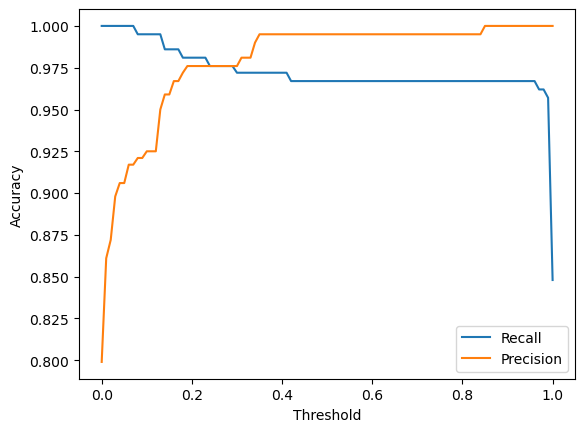

In [145]:
plt.plot(df_scores.threshold, df_scores['r_thres'], label='Recall')
plt.plot(df_scores.threshold, df_scores['p_thres'], label='Precision')

plt.xlabel('Threshold')
plt.ylabel('Accuracy')

plt.legend()

#### Answer: 0.29 rounded to 0.3

# Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

F1 = 2 * P * R / (P + R)

Where P is precision and R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.1
- 0.4
- 0.6
- 0.7

In [156]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    r_thres = tp / (tp + fn)
    p_thres = tp / (fp + tp)
    f1 = (2 * p_thres * r_thres) / (p_thres + r_thres)
    
    scores.append((t, round(r_thres, 3), round(p_thres, 3), round(f1, 5)))

In [157]:
scores

[(0.0, 1.0, 0.799, 0.88842),
 (0.01, 1.0, 0.861, 0.92544),
 (0.02, 1.0, 0.872, 0.93157),
 (0.03, 1.0, 0.898, 0.94619),
 (0.04, 1.0, 0.906, 0.95045),
 (0.05, 1.0, 0.906, 0.95045),
 (0.06, 1.0, 0.917, 0.95692),
 (0.07, 1.0, 0.917, 0.95692),
 (0.08, 0.995, 0.921, 0.95672),
 (0.09, 0.995, 0.921, 0.95672),
 (0.1, 0.995, 0.925, 0.9589),
 (0.11, 0.995, 0.925, 0.9589),
 (0.12, 0.995, 0.925, 0.9589),
 (0.13, 0.995, 0.95, 0.97222),
 (0.14, 0.986, 0.959, 0.97196),
 (0.15, 0.986, 0.959, 0.97196),
 (0.16, 0.986, 0.967, 0.97653),
 (0.17, 0.986, 0.967, 0.97653),
 (0.18, 0.981, 0.972, 0.97642),
 (0.19, 0.981, 0.976, 0.97872),
 (0.2, 0.981, 0.976, 0.97872),
 (0.21, 0.981, 0.976, 0.97872),
 (0.22, 0.981, 0.976, 0.97872),
 (0.23, 0.981, 0.976, 0.97872),
 (0.24, 0.976, 0.976, 0.9763),
 (0.25, 0.976, 0.976, 0.9763),
 (0.26, 0.976, 0.976, 0.9763),
 (0.27, 0.976, 0.976, 0.9763),
 (0.28, 0.976, 0.976, 0.9763),
 (0.29, 0.976, 0.976, 0.9763),
 (0.3, 0.972, 0.976, 0.97387),
 (0.31, 0.972, 0.981, 0.97619),
 (0.32

In [158]:
df_scores = pd.DataFrame(scores)

In [159]:
columns = ['threshold', 'r_thres', 'p_thres', 'f1']
df_scores = pd.DataFrame(scores, columns = columns)

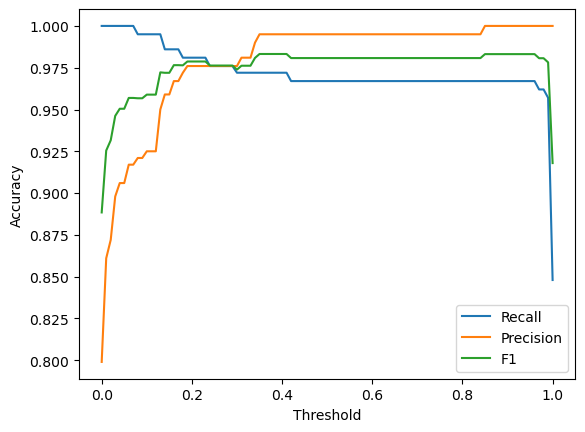

In [160]:
plt.plot(df_scores.threshold, df_scores['r_thres'], label='Recall')
plt.plot(df_scores.threshold, df_scores['p_thres'], label='Precision')
plt.plot(df_scores.threshold, df_scores['f1'], label='F1')

plt.xlabel('Threshold')
plt.ylabel('Accuracy')

plt.legend()

#### Answer: 0.4

# Question 5

Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

`KFold(n_splits=5, shuffle=True, random_state=1)`

- Iterate over different folds of `df_full_train`
- Split the data into train and validation
- Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
- Use AUC to evaluate the model on validation

How large is standard devidation of the AUC scores across different folds?

- 0.003
- 0.014
- 0.09
- 0.24


In [161]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model, auc

In [162]:
dv, model = train(df_train, y_train, C=1.0)

In [163]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [164]:
y_pred = predict(df_val, dv, model)

In [183]:
from sklearn.model_selection import KFold

In [184]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
train_idx, val_idx = next(kfold.split(df_full_train))

In [185]:
dv, model = train(df_full_train, df_full_train.card.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.996097337006428

In [176]:
from tqdm.auto import tqdm

# Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

- Iterate over the following C values: `[0.01, 0.1, 1, 10]`
- Initialize `KFold` with the same parameters as previously
- Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
- Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

- 0.01
- 0.1
- 1
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

In [181]:
n_splits = 5

for C in tqdm([0.01, 0.1, 1, 10]):
    
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
    scores = []
    
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.card.values
        y_val = df_val.card.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
    print('C=%s %.5f +- %.5f' % (C, np.mean(scores), np.std(scores)))    

  0%|          | 0/4 [00:00<?, ?it/s]

C=0.01 0.99645 +- 0.00274
C=0.1 0.99645 +- 0.00274
C=1 0.99645 +- 0.00274
C=10 0.99645 +- 0.00274


#### Answer: 0.01